Include all the packages needed for this exercise as reported below

In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import math 
import statsmodels.api as sm
import sklearn
from sklearn.neighbors import KernelDensity
from scipy.integrate import nquad
import uproot
import pandas

Welcome to JupyROOT 6.14/04


Define two classes where one defines the caracteristics of a sample (name, sample identification and cross-section), the other defines which setup to be fitted (center of the ellipse, radius or both) 

In [2]:
class Sample:
    def __init__(self, name, sample_id, xs):
        #define the name, the sample_id and the cross-section
        
class FitSetup:
    x0y0 = 1
    ab = 2
    x0y0ab = x0y0 + ab

In the following parts open the files, called "anaTuples", where already a selection is applied (Central energy scale).

Specify for the two samples we want to analyze, Signal SM and TT, their cross-sections and their sample id (please refer to the exercise of significance estimation).

In [3]:
#path = "/gpfs/ddn/cms/user/cmsdas/2019/hh_bbtautau/anaTuples/" #in Pisa
#path = "/eos/home-m/mgrippo/CMSDAS_2019_hh_bbtautau/anaTuples/" #on Swan

#open the anaTuples for each channel - define a map
anaTuples = {} 
channel = #choose the channel with which you want to work

#defined the samples we want to compare
sample_list = [
    Sample("Signal", -125, 0.03353 * 2 * 5.809e-01 * 6.256e-02),
    Sample("TT", 1, 831.76)
]


#open the file with uproot, create a pandas DataFrame (as in Significance Estimation exercise) and create total weight


#defined the map for each sample name
samples = {}
for sample in sample_list:
    samples[sample.name] = sample
    
    

Make the plot for both Signal and TT of mass of Higgs into bb candidate and of Higgs into tau pair candidate, in order to view the different behaviour of the signal and of the background. What can you notice?

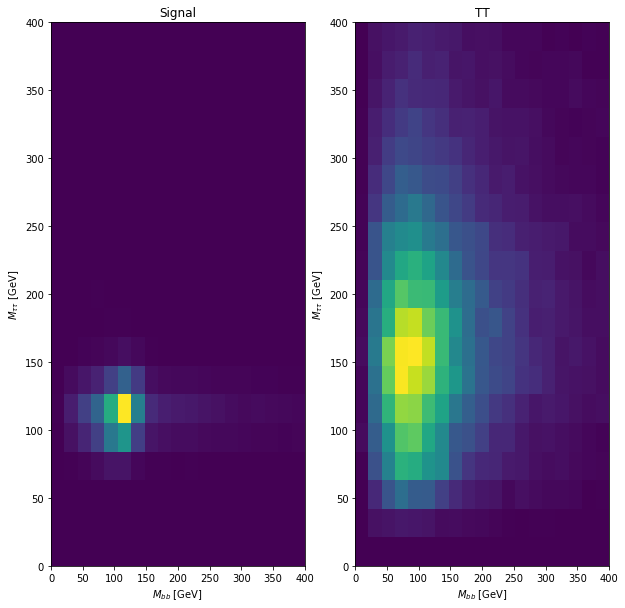

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))

n = 0
bins_x = np.linspace(0, 400, 20)
bins_y = np.linspace(0, 400, 20)
for sample in sample_list:
    #create an hist2d with pyplot, set axis labels and title of the histogram
    
    n += 1
#plt.subplots_adjust(bottom=0.1, right=1.5, top=1.5)
plt.show()

Write the code for the minimization of the ellipse cut around mbb and mtautau. It has to be first calculated with 2 paramenters (the center of the ellipse or the radius of the ellipse), then also there is the possiblity to have a fit of 4 parameters

In [5]:
class EllipseMinimization( ROOT.TPyMultiGenFunction ):
    def __init__( self, samples, x0, y0, a, b, fit_setup):
        #define the constructor of the class
        ROOT.TPyMultiGenFunction.__init__( self, self )

    def NDim(self):
        if self.fit_setup == FitSetup.x0y0ab:
            return 4
        return 2

    def DoEval(self, args):
        n = 0
        #define the elements and the args according to which setup should be run  (center or radius)
        
        #calculate the number of signal and bkg events
        
        #calculate the significance as in the previous exercise to obtain the minimum   
    
        return #significance
        
    def CalcNumEvents(self, sample_name, x0, y0, a, b):
        #define the number of events inside the ellipse reweighted with total weight and cross-section

In [6]:
def FindParams(samples, x0, y0, a, b, fit_setup):
    #use as minimizer Minuit
    ellipse = EllipseMinimization(samples, x0, y0, a, b, fit_setup)

    minimizer.SetFunction(ellipse)

    # Set the variables to be minimized!
    c_factor = 0.1
    r_factor = 5.0
    n = 0
    #set the limited variables for the different setups
        
    minimizer.Minimize()
    #result = [x for ix in minimizer.X()]
    result = [minimizer.X()[i] for i in range(ellipse.NDim())]
    return tuple(result)

Now you have to choose a starting point for the minimization. For the center values the indices of the maximum values for the mass candidate and their bin extremis should be taken

In [1]:
sgn_id = samples["Signal"].sample_id
#create two histograms for m_bb and m_tautau and take the maximum value and then the center considering 
#the bin extremis
print(x0, y0)

NameError: name 'samples' is not defined

For the radius initial values should be used the 25th and 75th percentiles.

In [8]:
#calculate the radius considering the percentile interval and the initial valuse calculated for the centers
print(a, b)

(23.739181518554688, 12.567741394042969)


Calculate new center parameters starting from the initial values calculated for radius and center

In [9]:
#use function FindParams
print(new_x0, new_y0)

(0.0001524493471879877, 52.03097142803573)
(0.0001524493471879877, 52.03097142803573)
(0.00015225880636873424, 51.96593983488482)
(0.00015256028376352772, 52.06883408798619)
(0.00014510060675268724, 49.52284587240661)
(0.00015428967233843487, 52.659074513338794)
(0.00015240291859414993, 52.01512534614705)
(0.00015264646081329276, 52.09824632029012)
(0.00014206084650231356, 48.48537551485735)
(0.00015181527750839175, 51.81456340798853)
(0.00015151014815228297, 51.71042274026908)
(0.0001537915358816382, 52.4890605104655)
(0.00015227924556181457, 51.97291573272099)
(0.00015279416665619225, 52.14865833341721)
(0.00015233083082953592, 51.99052178771844)
(0.00015246826922040024, 52.03742951884411)
(0.0001519123757770639, 51.84770305296689)
(0.00015331107677893152, 52.3250797896137)
(0.00015234988519194885, 51.997025042763966)
(0.0001528647967522579, 52.17276438948198)
(0.0001360189366711319, 46.423271323559426)
(0.00015599484678072256, 53.2410506537619)
(0.0001565197662760499, 53.42020570930

Calculate new radius parameters starting from the starting point for radius and the calculated one for centers

In [10]:
#use FindParams
print(new_a, new_b)

(0.0001565197662760499, 53.420205709307766)
(0.0001565197662760499, 53.420205709307766)
(0.0001565604968968018, 53.43410707263716)
(0.00015646464271430212, 53.40139203434481)
(0.0001613452594175361, 55.067146810742905)
(0.00015125439523451794, 51.62313425394674)
(0.000271374658856037, 92.62018750280346)
(3.856405876134296e-05, 13.16191559079783)
(0.00015662259704801382, 53.45530185800679)
(0.00015641342761892852, 53.38391231919206)
(0.0001668329841970995, 56.94010761036046)
(0.00014526614276522937, 49.57934332351258)
(0.0002852446119449012, 97.35400333203748)
(4.553877417692819e-05, 15.542386384546106)
(0.00018093011560183056, 61.75145941255841)
(0.00012943934524080187, 44.17765636990862)
(0.00018383140578412011, 62.741669927484395)
(0.00012862558233497996, 43.89991904086775)
(0.00016147814813857625, 55.112501739282024)
(0.0001506729232956999, 51.42467784601251)
(0.000509971819084087, 174.0534127387744)
(0.0010718985762412877, 365.8390489884446)
(0.00013199930437187712, 45.051370576383

Calculate the final parameters fitting the 4 parameters, using as initial values the center and radius values obtained by previus fit in 2 dimension

In [11]:
#use FindParams in 4 dimension
print(new_x0, new_y0, new_a, new_b)
print(final_x0, final_y0, final_a, final_b)

(0.0013861336755834812, 473.08750742492606)
(0.0013861336755834812, 473.08750742492606)
(0.00138613993903111, 473.08964513998114)
(0.001386146316132677, 473.0918216451322)
(0.0013845924670967224, 472.5614928750552)
(0.0013862313491915632, 473.12084343327984)
(0.0013868143919034894, 473.319835946171)
(0.0013855426390205082, 472.8857866101885)
(0.0014161895157897167, 483.34556750758327)
(0.0013516175451849816, 461.307150029521)
(0.0013861555935569933, 473.09498803061314)
(0.0013861179387486048, 473.0821364422296)
(0.0013881294850839052, 473.7686773282928)
(0.0013843376605523782, 472.47452738603874)
(0.0014993149448212166, 511.71628147035176)
(0.000832351678464525, 284.0816782695791)
(0.0015269182450266166, 521.1372895021908)
(0.00045390492637786237, 154.91777886256594)
(0.0013863207423440345, 473.1513533216322)
(0.0013860057527798337, 473.0438473642938)
(0.0013977166235840401, 477.04076827901383)
(0.0013745560476269637, 469.1360623021918)
(0.0019054337956943257, 650.3246698690818)
(0.000